# 0. Libraries and Datasets

## 0.1. Import Libraries

In [9]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import xgboost           as xgb
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from IPython.core.display import display, HTML, Image



%matplotlib inline
warnings.filterwarnings('ignore')
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.set_style('darkgrid')

## 0.2. Importing Datasets

In [10]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 1. Data Understanding

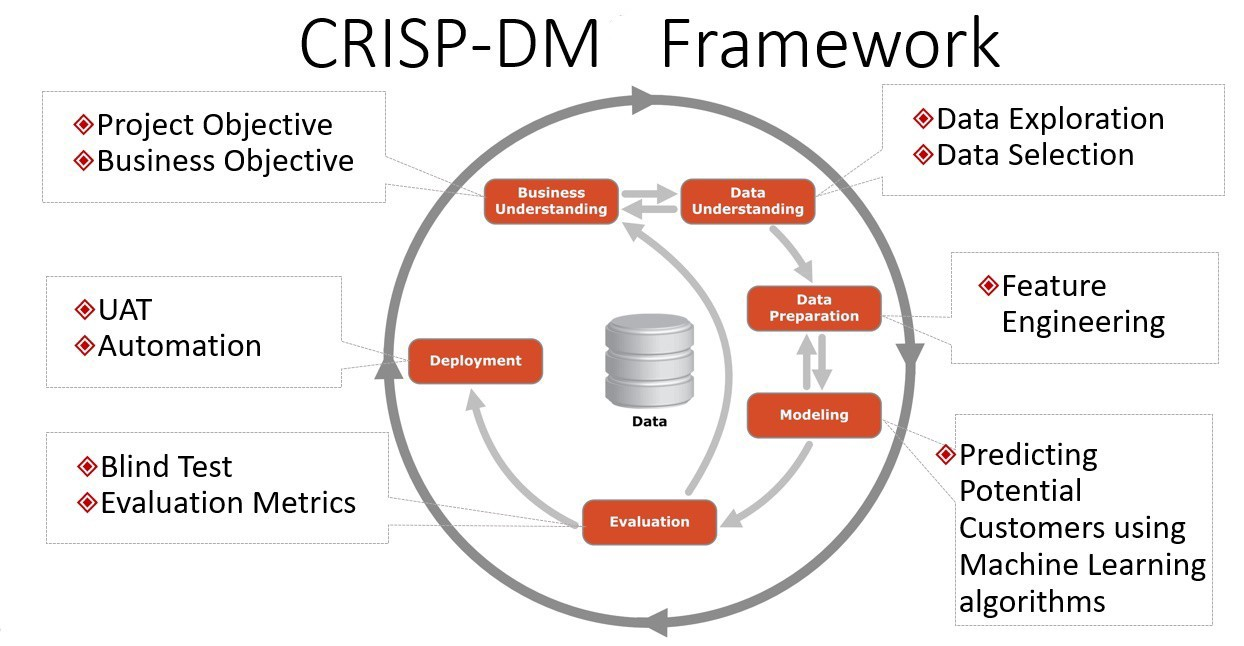

In [11]:
Image(filename='crisp.jpeg')

## 1.1. Datasets Dimensions

In [12]:
df1 = train.copy()

In [13]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
print('Train Dataset\n\nRows: {}\nCols: {}\n_____________________\n\nTest Dataset\n\nRows: {}\nCols: {}'.format(df1.shape[0], df1.shape[1], test.shape[0], test.shape[1]))

Train Dataset

Rows: 891
Cols: 12
_____________________

Test Dataset

Rows: 418
Cols: 11


## 1.2. Dataset dtypes

In [16]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 1.3. Checking Missing Values

In [18]:
df1.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [19]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

## 1.4. Dealing with missing values

In [20]:
df1['Age'].fillna(train['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [21]:
df1.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [22]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df1 = df1[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [24]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [26]:
test = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [27]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## 1.5. Changing Dtypes

In [29]:
df1['Age'] = df1['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [30]:
df1['Age'].dtypes

dtype('int32')

In [31]:
test['Age'].dtypes

dtype('int32')

## 1.6. Checking Outliers

<AxesSubplot:>

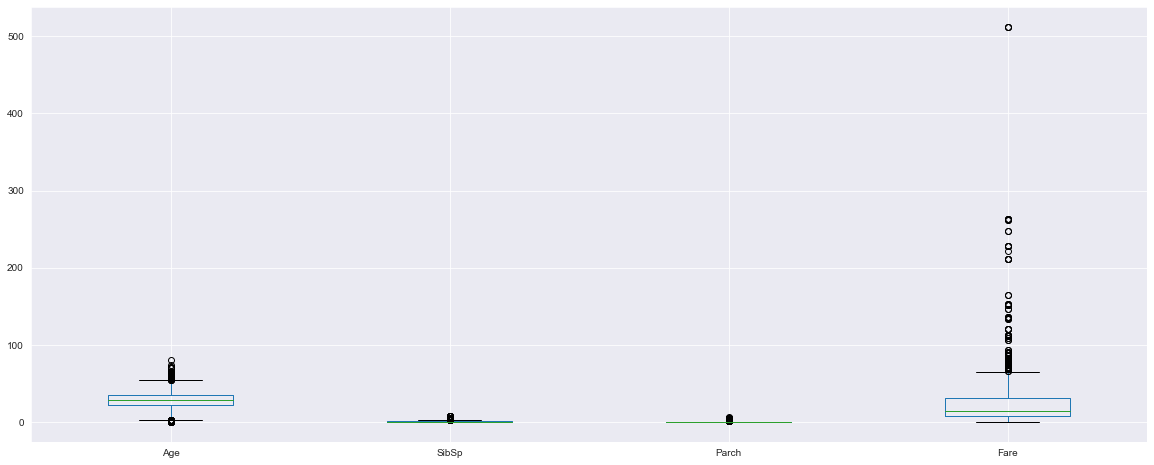

In [92]:
plt.figure(figsize=(20,8))
df1.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])

In [93]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 360x720 with 0 Axes>

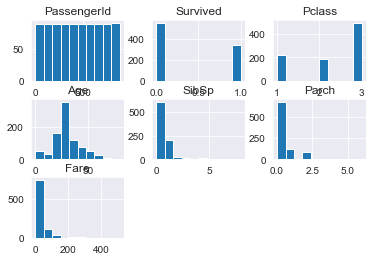

In [104]:
plt.figure(figsize=(5,10))
df1.hist()

# 2. Feature Engineering

In [32]:
df2 = df1.copy()

In [33]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


## 2.1. Hypothesis

**1.** Young passenger can have more chances to survived.

**2.** Passengers who get a higher class can have more chances to survived.

**3.** The bigger the family was, the lower chances they have to survived.

## 2.2. Feature Engineering

In [159]:
df2['Family_Size'] = df2['SibSp'] + df2['Parch']

df2['Fare_Per_Person'] = df2['Fare'] / (df2['Family_Size']+1)
df2['Embarked'] = df2['Embarked'].apply(lambda x: 'Cherbourg' if x == 'C' else 'Queenstown' if x == 'Q' else 'Southampton')

group_age = []
for i in df2['Age']:
    if i < 11:
        group_age.append('Child')
    elif i >=11 and i <= 17:
        group_age.append('Teenager')
    elif i >=18 and i <=44:
        group_age.append('Adult')
    else:
        group_age.append('Elderly')

df2['Group_Age'] = group_age


test['Family_Size'] = test['SibSp'] + test['Parch']

test['Fare_Per_Person'] = test['Fare'] / (test['Family_Size'])
test['Embarked'] = test['Embarked'].apply(lambda x: 'Cherbourg' if x == 'C' else 'Queenstown' if x == 'Q' else 'Southampton')

group_age_test = []
for i in test['Age']:
    if i < 11:
        group_age_test.append('Child')
    elif i >=11 and i <= 17:
        group_age_test.append('Teenager')
    elif i >=18 and i <=44:
        group_age_test.append('Adult')
    else:
        group_age_test.append('Elderly')
test['Group_Age'] = group_age_test

In [160]:
df2['Family_Size'] = df2['Family_Size'].apply(str)
test['Family_Size'] = test['Family_Size'].apply(str)

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Name             891 non-null    object 
 3   Sex              891 non-null    object 
 4   Age              891 non-null    int32  
 5   SibSp            891 non-null    int64  
 6   Parch            891 non-null    int64  
 7   Ticket           891 non-null    object 
 8   Fare             891 non-null    float64
 9   Embarked         891 non-null    object 
 10  Family_Size      891 non-null    object 
 11  Fare_Per_Person  891 non-null    float64
 12  Group_Age        891 non-null    object 
 13  Survived         891 non-null    int64  
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 94.1+ KB


In [146]:
df2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Fare_Per_Person',
       'Group_Age', 'Survived'],
      dtype='object')

In [36]:
df2 = df2[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Fare_Per_Person',
       'Group_Age', 'Survived']]

# 3. Exploration Data Analysis

In [37]:
df3 = df2.copy()

In [38]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Fare_Per_Person,Group_Age,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Southampton,1,3.62500,Adult,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cherbourg,1,35.64165,Adult,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Southampton,0,7.92500,Adult,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Southampton,1,26.55000,Adult,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Southampton,0,8.05000,Adult,0


<AxesSubplot:>

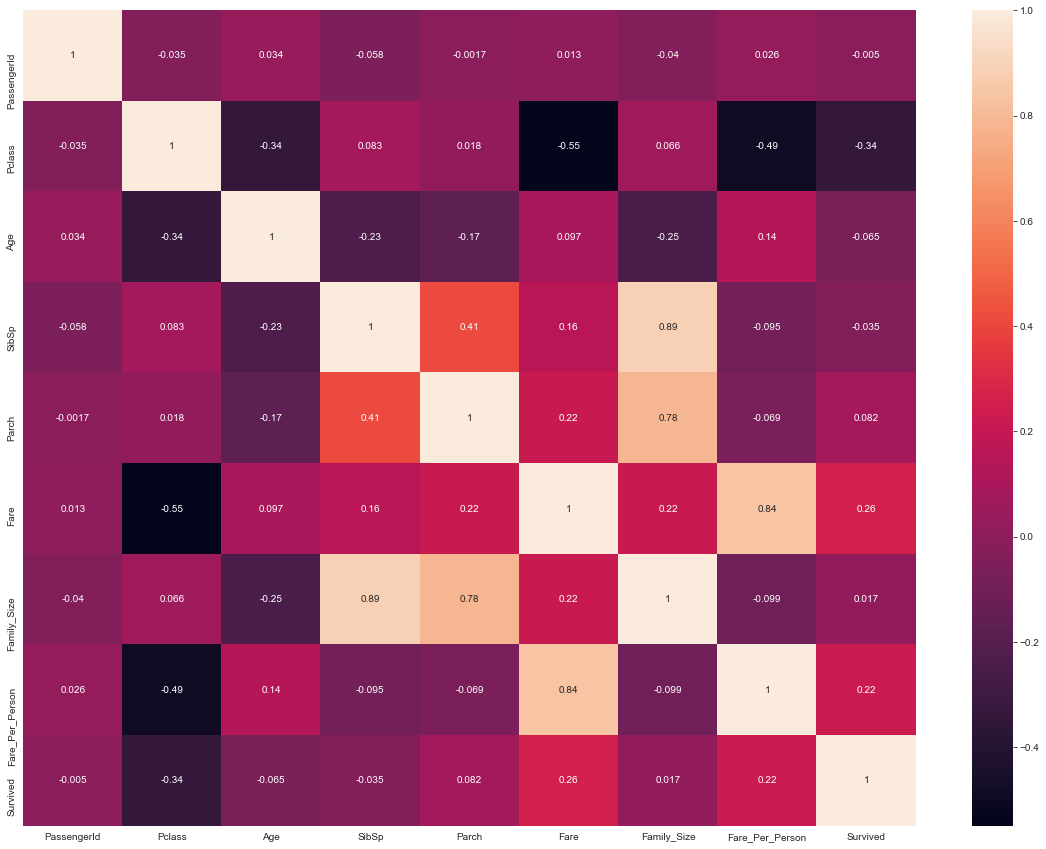

In [71]:
corr = df3.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

**1.** Young passenger can have more chances to survived.

<AxesSubplot:xlabel='Group_Age', ylabel='count'>

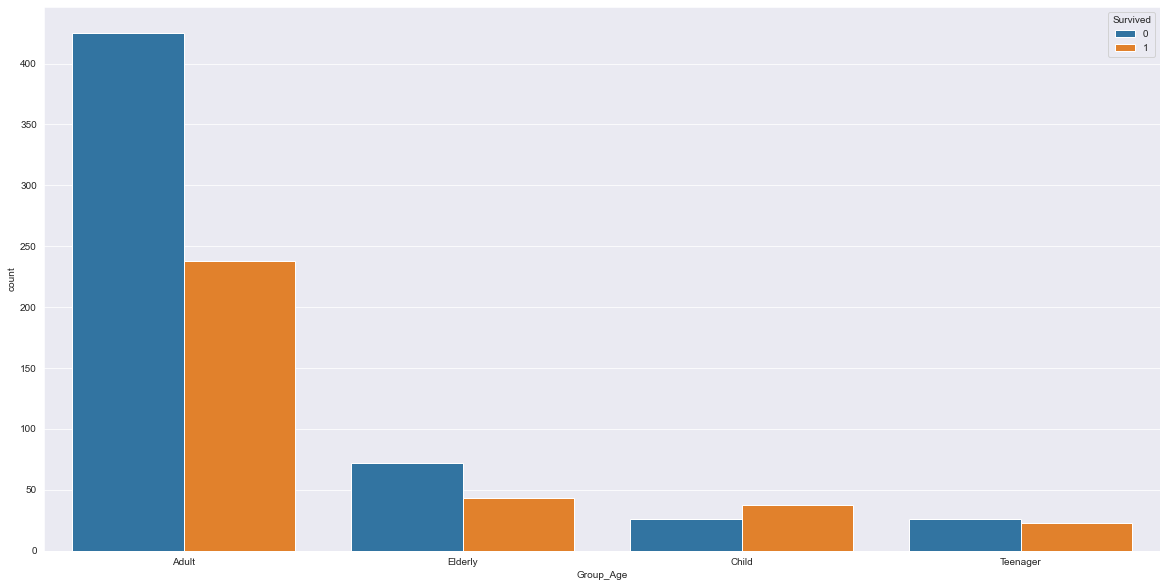

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(df3['Group_Age'], hue='Survived', data=df3)

**2.** Passengers who get a higher class can have more chances to survived.

**Positive** Passengers who got a lower class, it was who the less survived.

In [40]:
df3.sample(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Fare_Per_Person,Group_Age,Survived
262,263,1,"Taussig, Mr. Emil",male,52,1,1,110413,79.65,Southampton,2,26.55,Elderly,0
35,36,1,"Holverson, Mr. Alexander Oskar",male,42,1,0,113789,52.00,Southampton,1,26.00,Adult,0


[Text(0.5, 0, 'Survived'), Text(0, 0.5, 'Quantity of Passengers')]

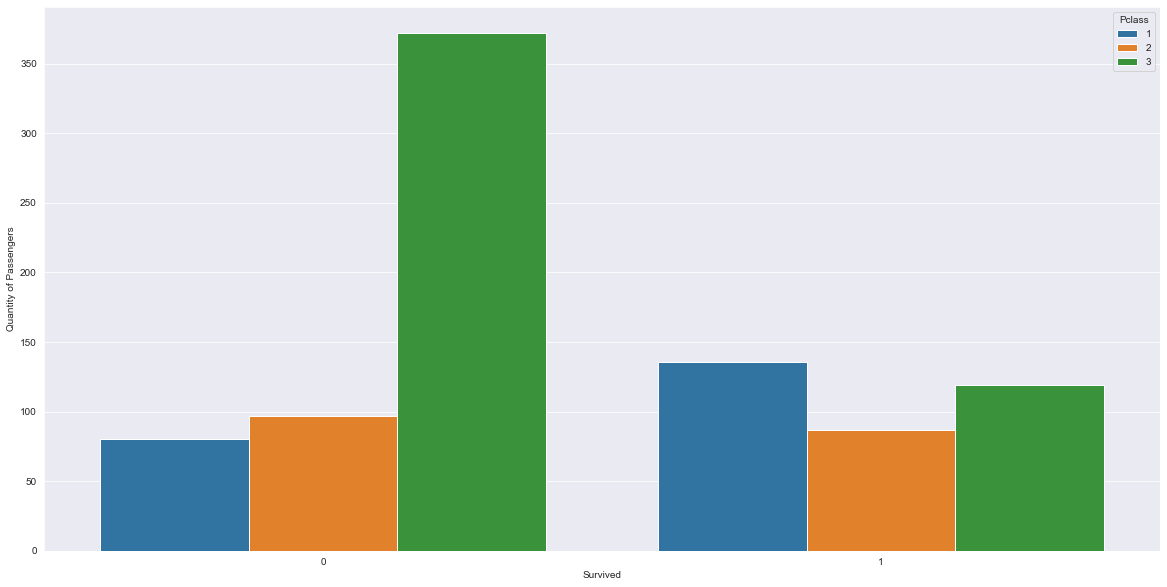

In [55]:
aux1 = df3[['Pclass', 'Survived','PassengerId']].groupby(['Pclass', 'Survived']).count().sort_values(ascending=False, by='PassengerId').reset_index()
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Survived', y='PassengerId', hue='Pclass',  data=aux1)
ax.set(xlabel='Survived', ylabel='Quantity of Passengers')

**3.** The bigger the family was, the lower chances they have to survived.

**Positive**

In [106]:
df3.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Fare_Per_Person,Group_Age,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Southampton,1,3.62500,Adult,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cherbourg,1,35.64165,Adult,1
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Southampton,0,7.92500,Adult,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Southampton,1,26.55000,Adult,1
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Southampton,0,8.05000,Adult,0


<AxesSubplot:xlabel='PassengerId', ylabel='Family_Size'>

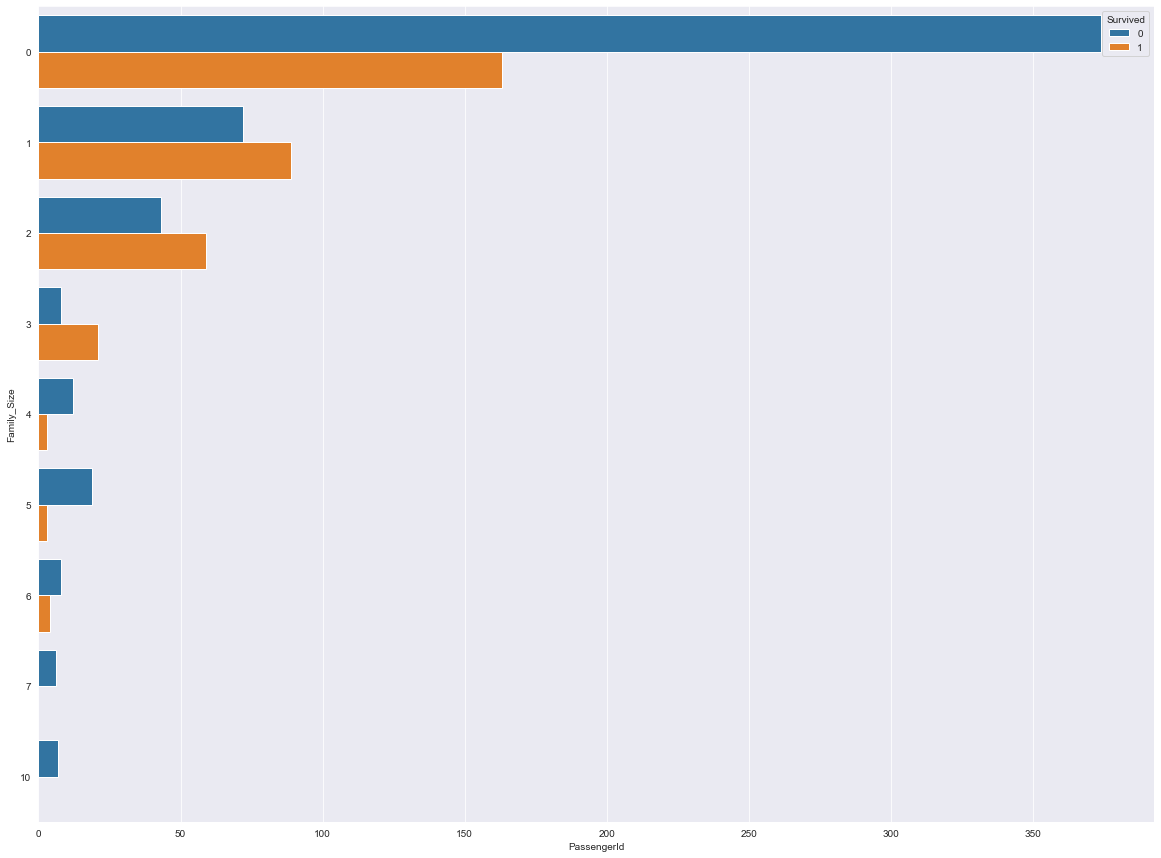

In [172]:
aux1 = df3[['PassengerId', 'Survived', 'Family_Size']].groupby(['Survived', 'Family_Size']).count().reset_index().sort_values(ascending=False, by='PassengerId')
plt.figure(figsize=(20,15))
sns.barplot(x='PassengerId', y='Family_Size', hue='Survived', data=aux1, orient='h')

In [139]:
aux1.columns

Index(['Survived', 'Family_Size', 'Quantity'], dtype='object')

In [166]:
aux1

,Survived,Family_Size,PassengerId
0,0,0,374
9,1,0,163
10,1,1,89
1,0,1,72
11,1,2,59
2,0,2,43
12,1,3,21
5,0,5,19
4,0,4,12
3,0,3,8
